In [16]:
# Load Libraries
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import make_blobs
from matplotlib import pyplot

In [17]:
# prepare multi-class classification dataset
def create_dataset():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2,
                        random_state=2)
    # one hot encode output variable
    y = to_categorical(y)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

In [18]:
# fit model with given number of nodes, returns test set accuracy
def evaluate_model(n_nodes, trainX, trainy, testX, testy):
    # configure the model based on the data
    n_input, n_classes = trainX.shape[1], testy.shape[1]
    # define model
    model = Sequential()
    model.add(Dense(n_nodes, input_dim=n_input, activation='relu',
                    kernel_initializer='he_uniform'))
    model.add(Dense(n_classes, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model on train set
    history = model.fit(trainX, trainy, epochs=100, verbose=0)
    # evaluate model on test set
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    return history, test_acc


In [19]:
# prepare dataset
trainX, trainy, testX, testy = create_dataset()

nodes 1 and accuracy 0.15800000727176666
nodes 2 and accuracy 0.3319999873638153
nodes 3 and accuracy 0.6159999966621399
nodes 4 and accuracy 0.843999981880188
nodes 5 and accuracy 0.984000027179718
nodes 6 and accuracy 1.0
nodes 7 and accuracy 1.0


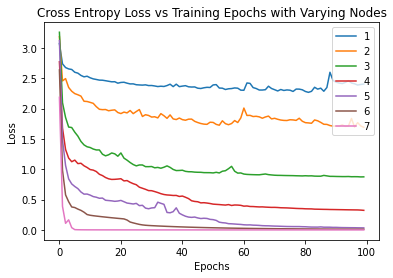

In [20]:
num_nodes = [1, 2, 3, 4, 5, 6, 7]
for n_nodes in num_nodes:
    # evaluate model with a given number of nodes
    history, result = evaluate_model(n_nodes, trainX, trainy, testX, testy)
    # summarize final test set accuracy
    print('nodes {} and accuracy {}'.format(n_nodes, result))
    # plot learning curve
    pyplot.plot(history.history['loss'], label=str(n_nodes))

# show the plot
pyplot.title("Cross Entropy Loss vs Training Epochs with Varying Nodes")
pyplot.xlabel("Epochs")
pyplot.ylabel("Loss")
pyplot.legend()
pyplot.show()
# nodes 1 and accuracy 0.1459999978542328
# nodes 2 and accuracy 0.3160000145435333
# nodes 3 and accuracy 0.6919999718666077
# nodes 4 and accuracy 0.5879999995231628
# nodes 5 and accuracy 0.9380000233650208
# nodes 6 and accuracy 1.0
# nodes 7 and accuracy 1.0

In [21]:
!jupyter nbconvert --to script multiclass_classification_make_blob_keras.ipynb

[NbConvertApp] Converting notebook multiclass_classification_make_blob_keras.ipynb to script
[NbConvertApp] Writing 2653 bytes to multiclass_classification_make_blob_keras.py
